# 🎨 Plotnine Contest Submission: Artistic Tetris and P9 Heatmap (Entry 1)

## 💡 Motivation

As an avid user of ggplot in R, I was excited to explore its Python counterpart, `plotnine`. This contest provided the perfect opportunity to pay homage to this powerful visualization package while pushing the boundaries of my creativity. 🚀 Inspired by other submissions and the package's capabilities, I decided to create something that blends artistic expression and my love for games and movies with the technical prowess of plotnine.

My submission might not be the most conventional, but it represents my artistic self exploring out-of-the-box visualizations while staying true to the contest's goal of showcasing plotnine's features.🎭🖌️

## 🛠️ The Process

This project was a labor of love, spanning multiple iterations over several days and nights.☀️🌙 While I leveraged AI chatbots to expedite certain aspects of the process, the core ideas, imagination, and visualization concepts were entirely my own.

The name "plotnine," often abbreviated as "p9," served as a spark of inspiration. I aimed to incorporate this into my visualizations, resulting in two distinct pieces:
1. Tetris-themed game board
2. Heatmap with annotations

## 📦 Package Requirements

In [67]:
pip install -q plotnine pandas numpy

## 🎮 Ready Player P9: The Tetris Challenge

For this visualization, I reimagined the classic game of Tetris with a plotnine twist. The code creates a game board with various Tetris pieces, including a special "P9" formation in the center.

### 🔍 Features Highlighted:

1. `geom_tile()`: Used to create the individual blocks of the Tetris pieces. 🧱
2. `scale_fill_manual()`: Custom color palette for different Tetris pieces. 🌈
3. `coord_fixed()`: Ensures square tiles for authentic Tetris look. 🔲
4. `theme()`: Extensive use of theme customization for a game-like appearance. 🎮
5. `annotate()`: Used to add game information and borders. ℹ️

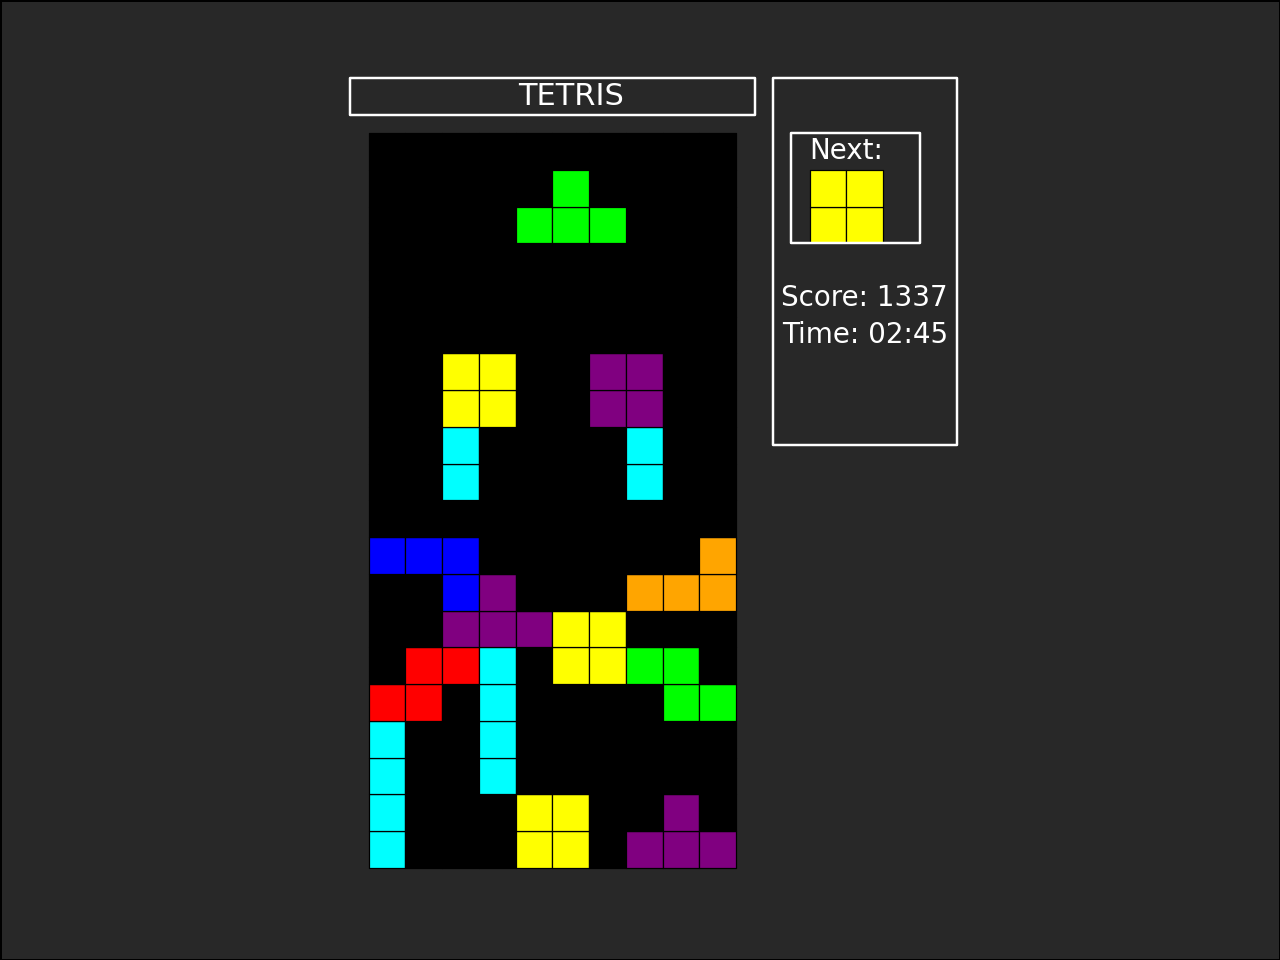

In [68]:
import pandas as pd
import numpy as np
from plotnine import *

# Define Tetris pieces
pieces = {
    'I': [(0,0), (0,1), (0,2), (0,3)],
    'O': [(0,0), (0,1), (1,0), (1,1)],
    'T': [(0,0), (1,0), (2,0), (1,1)],
    'S': [(0,0), (1,0), (1,1), (2,1)],
    'Z': [(0,1), (1,1), (1,0), (2,0)],
    'J': [(0,1), (1,1), (2,1), (2,0)],  # Mirrored L for 9 shape
    'L': [(0,0), (1,0), (2,0), (2,1)]
}

# Create the game board
board_width, board_height = 10, 20
board = pd.DataFrame({
    'x': np.repeat(range(board_width), board_height),
    'y': np.tile(range(board_height), board_width),
    'value': 0
})

# Function to add a piece to the board
def add_piece(board, piece, x, y, value):
    for dx, dy in pieces[piece]:
        board.loc[(board['x'] == x+dx) & (board['y'] == y+dy), 'value'] = value
    return board

# Add pieces to create a game in progress
# Bottom half
board = add_piece(board, 'I', 0, 0, 1)
board = add_piece(board, 'O', 4, 0, 2)
board = add_piece(board, 'T', 7, 0, 3)
board = add_piece(board, 'S', 0, 4, 4)
board = add_piece(board, 'Z', 7, 4, 5)
board = add_piece(board, 'J', 0, 7, 6)
board = add_piece(board, 'L', 7, 7, 7)
board = add_piece(board, 'I', 3, 2, 1)
board = add_piece(board, 'O', 5, 5, 2)
board = add_piece(board, 'T', 2, 6, 3)

# Create "P9" in the middle of the board
# "P"
board = add_piece(board, 'I', 2, 10, 1)
board = add_piece(board, 'O', 2, 12, 2)
# "9"
board = add_piece(board, 'I', 7, 10, 1)
board = add_piece(board, 'O', 6, 12, 3)

# Create the current piece (T-shape)
current_piece = pd.DataFrame({
    'x': [4, 5, 6, 5],
    'y': [17, 17, 17, 18],
    'value': 5
})

# Create the next piece (square)
next_piece = pd.DataFrame({
    'x': [12, 13, 12, 13],
    'y': [17, 17, 18, 18],
    'value': 2
})

# Combine all elements
all_elements = pd.concat([board, current_piece, next_piece])

# Create the plot
tetris_plot = (
    ggplot(all_elements, aes(x='x', y='y', fill='factor(value)')) +
    geom_tile(color="black", size=0.25) +
    scale_fill_manual(values=['#000000', '#00FFFF', '#FFFF00', '#800080', '#FF0000', '#00FF00', '#0000FF', '#FFA500']) +
    coord_fixed(ratio=1) +
    labs(title='', x='', y='') +
    theme_minimal() +
    theme(
        legend_position='none',
        axis_text=element_blank(),
        axis_ticks=element_blank(),
        panel_grid=element_blank(),
        plot_background=element_rect(fill='#282828', color=None),
        panel_background=element_rect(fill='#282828', color=None)
    )
)

# Add game info borders and text
game_info = [
    # Top border with centered text
    annotate("rect", xmin=-1, xmax=10, ymin=20, ymax=21, fill="none", color="white"),
    annotate("text", x=5, y=20.5, label="TETRIS", size=11, color="white"),

    # Border for all game info
    annotate("rect", xmin=10.5, xmax=15.5, ymin=11, ymax=21, fill="none", color="white"),
    # Border for next piece
    annotate("rect", xmin=11, xmax=14.5, ymin=16.5, ymax=19.5, fill="none", color="white"),
    # Game info text
    annotate("text", x=12.5, y=19, label="Next:", size=10, color="white"),
    annotate("text", x=13, y=15, label="Score: 1337", size=10, color="white"),
    annotate("text", x=13, y=14, label="Time: 02:45", size=10, color="white")
]

# Combine plot and game info
final_plot = tetris_plot + game_info[0] + game_info[1] + game_info[2] + game_info[3] + game_info[4] + game_info[5] + game_info[6]

# Display the plot
print(final_plot)

# final_plot.save('p9_tetris.png', dpi=300)
# print("Plot saved as 'p9_tetris.png'")

## 🌈 The Secret Life of P9: A Colorful Adventure

This visualization creates a heatmap with annotations, featuring "P9" at its center.

### 🔍 Features Highlighted:

1. `geom_tile()`: Creates the heatmap base. 🟥🟧🟨🟩
2. `geom_text()`: Adds symbolic annotations to each tile. 🔣
3. `scale_fill_gradient()`: Creates a smooth color transition from purple to yellow. 🟣➡️🟡
4. `scale_color_manual()`: Controls the color of the annotations. 🎨
5. `theme()`: Extensive customization for a clean, focused appearance. 🧹✨

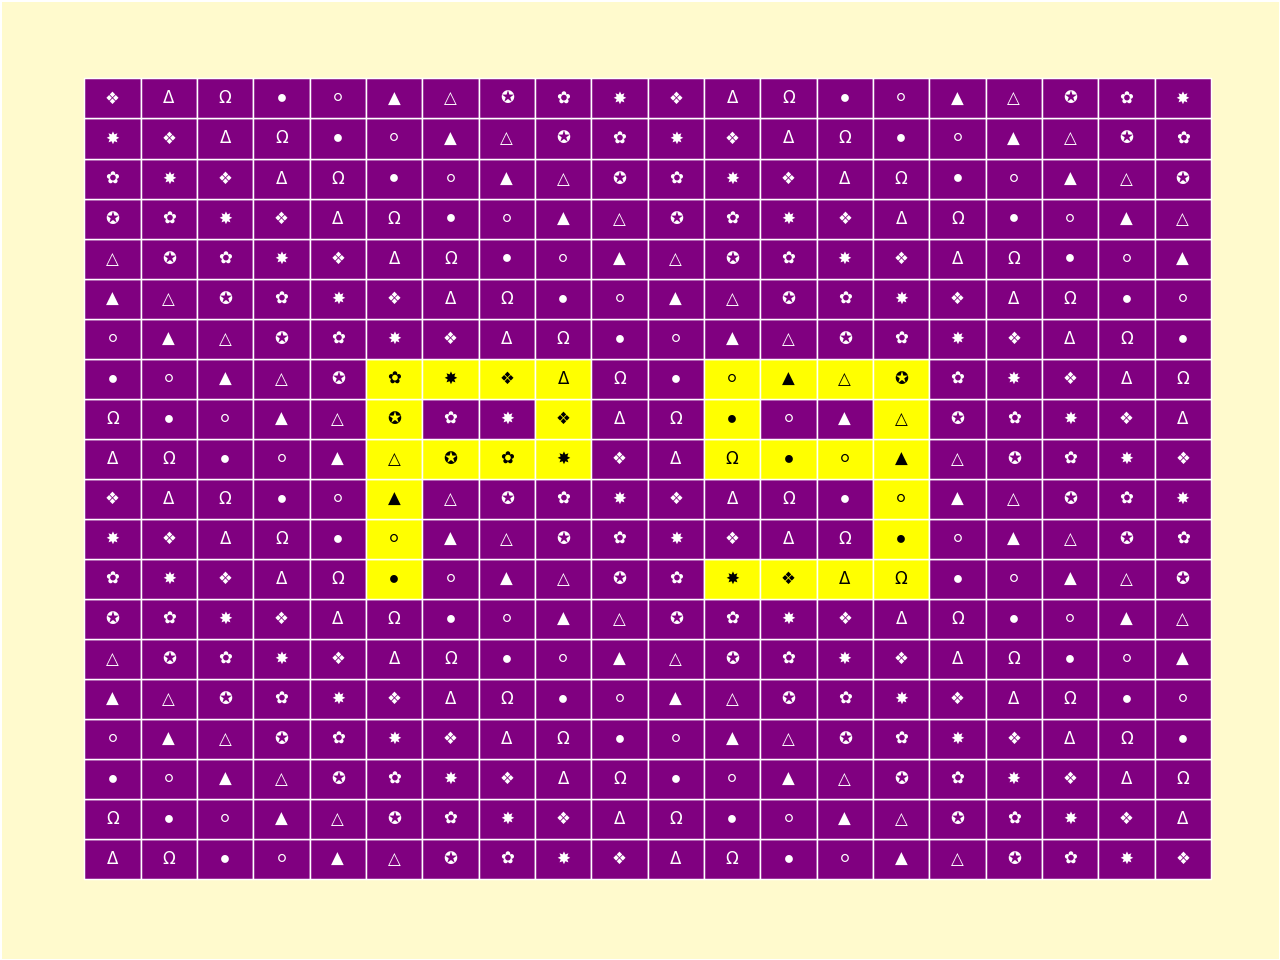

In [69]:
import pandas as pd
import numpy as np
from plotnine import ggplot, aes, geom_tile, geom_text, scale_fill_gradient, scale_color_manual, theme, element_text, element_blank

# Create a base grid
grid_size = 20
data = np.zeros((grid_size, grid_size))

# Define the "P9" shape in the grid with your coordinates
P9_coords = [
    (7, 5), (8, 5), (9, 5), (10, 5), (11, 5), (12, 5),  # P vertical
    (12,6), (12, 7), (12, 8),  # P horizontal
    (11, 8),  # P horizontal
    (10,6), (10, 7), (10, 8),  # P horizontal
    (7, 14), (8, 14), (9, 14), (10, 14),(11,14),(12,14),  # 9 top
    (12,11), (12, 12), (12, 13),(12,14),  # 9 horizontal
    (11,11), (11,14),  # 9 horizontal
    (10,11), (10, 12), (10, 13),(10,14),  # 9 horizontal
    (7, 11), (7, 12), (7, 13), (7, 14)  # 9 bottom
]

# Fill the grid with intensity values to form "P9"
for x, y in P9_coords:
    data[x, y] = 1

# Convert the grid to a DataFrame
df = pd.DataFrame(data, columns=[f"Col_{i}" for i in range(grid_size)])
df['Row'] = df.index
df = df.melt(id_vars="Row", var_name="Column", value_name="Intensity")

# Normalize column names for plotnine
df['Column'] = df['Column'].apply(lambda x: int(x.split('_')[1]))

# Add annotations data
annotations = []
symbols = ['Δ', 'Ω', '⚫', '⚪', '▲', '△', '✪', '✿', '✸', '❖']

for i in range(grid_size):
    for j in range(grid_size):
        symbol = symbols[(i + j) % len(symbols)]
        color = 'black' if (i, j) in P9_coords else 'white'
        annotations.append({"Row": i, "Column": j, "Symbol": symbol, "Color": color})

annotations_df = pd.DataFrame(annotations)

# Base plot
p = (ggplot(df, aes('Column', 'Row')) +
     geom_tile(aes(fill='Intensity'), color='white', size = 0.3) +
     geom_text(aes(label='Symbol', color='Color'), data=annotations_df, size=6, ha='center', va='center') +
     scale_fill_gradient(low='purple', high='yellow') +
     scale_color_manual(values={'white': 'white', 'black': 'black'}) +
     theme(axis_text=element_blank(),
           axis_ticks=element_blank(),
           axis_title=element_blank(),
           plot_background=element_rect(fill='#FFFACD'),
           plot_title=element_text(size=15, ha='center', va='center'),
           panel_grid=element_blank(),
           panel_background=element_rect(fill='#FFFACD', color=None),
           panel_border=element_blank(),
           legend_position="none"))

# Display the plot
print(p)

# p.save('p9_abstract_heatmap.png', dpi=300)
# print("Plot saved as 'p9_abstract_heatmap.png'")

## 💭 Reflection

While these visualizations may not be the most conventional use of plotnine, they represent an artistic exploration of the package's capabilities. 🎨🔬 The Tetris-inspired plot showcases the flexibility of `geom_tile()` and annotation features, while the P9 heatmap demonstrates the power of combining different geometries (`geom_tile()` and `geom_text()`) with custom themes and color scales.

These submissions aim to strike a balance between utility and beauty. ⚖️ They demonstrate novel elements of plot design while still being comprehensible. The code is well-documented to help novices understand the process.

Although the result of multiple iterations and considerable effort, there may still be room for improvement. However, this submission represents a creative journey and a celebration of plotnine's versatility. 🎉

It was very tiring but super motivational to make this attempt on the famous old game Tetris. 😅💪 Just added a fun touch to the visualization. The second visualization is a heatmap with just annotations to make it more attractive, with P9 (the package name) in the middle.

Although it took me multiple iterations, manual efforts, and imagination, there might be some issues in the visualization, but nothing is perfect on the first shot. 🎯 This project allowed me to give some kind of accolade to the package, as it is derived from the famous ggplot in R, which I and every R community member use heavily. 📊❤️

Looking at the package and other submissions, I was motivated to use plotnine in an artistic way while staying true to the contest's goal of showcasing the package's capabilities. So, while this submission might not be the best, it represents my artistic self kicking in to try out-of-this-world visualizations. 🌠🎨